# PANDAS 4EVER

Import 

- pandas under the alias pd 
- datetime under the alias dt
- mayplotlib.pyplot under the alias plt

Run 
- %matplotlib inline

Read in as data
- the csv `FoodServiceData_23_0` in the data folder and assign to the variable `food`

In [3]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

food = pd.read_csv('data/FoodServiceData_23_0')

FileNotFoundError: [Errno 2] File b'/data/FoodServiceData_23_0' does not exist: b'/data/FoodServiceData_23_0'

## Data Exploration and Cleaning

The first question to ask yourself of a dataset: "what is this dataset treating as an observation?"

Think of an "observation" as an "event" or a "subject".  For example, an observation could be a:

- specific subject, like an individual person, with features about that person's characteristics or behaviors: medical data like `blood pressure` or `test results`, econ / sociological data like `yearly income` or `crime rate of neighorhood in which they live`, behavioral data like what products they purchased)

- aggregated subject, like in the Boston housing dataset, where each row was a suburb/town.  Features can be aggregated statistics about things within the region - like `crime rate` or `median house value` - or it can be about the specific region itself, such as `distance to Hahvahd Yahd`

- event, where each row isn't tied to a specific identity but instead tied to a specific action that occured. Often, these types of datasets will have a number of features that act as keys that distinguish events from each other, as well as features containing data about the event. For example, a store with multiple locations might have a dataset of "transactions", where the key features for each row are `Store`, `Time` and `Transaction ID`, with other features `Item Purchased`, `Payment Method`, `Coupons Used`, etc.  Notice that the same type of data - purchasing items - can be organized as either features of a "person" or an "event".

Figuring out which "observation" makes a row is an important part of figuring out how to analyze a dataset.  

Take a look at the first five rows.  How does this dataset appear to be organized?  What is an "observation"?  What are the features?

In [ ]:
#Your code here
food.head()

Which have nulls in them?

In [ ]:
#Your code here
food.inf()
# get rid of columns that are completely null 
food.dropna('', axis = 1)

#### There are 3 features that are all nulls, let's get rid of them.

**First**, use a method to drop a specific column.  **Then**, for the other two, use a method that will drop all columns that are completely null. 

Check that only those columns were dropped.

In [ ]:
#Your code here
# a few ways:
food.drop('PlaceName', axis = 1, inplace = True) # this will only drop placename column
food.dropna(how = 'all', axis = 1, inplace = True) # this works.  make sure to specify 'all'

food.info()

#### For now, let's only look at rows w/ values in the `Score` column

Drop all rows w/ nulls for `Score`.  Make sure you print out how many rows there are pre-drop, how many you dropped, and how many there are after dropping!

In [ ]:
#Your code here
# num of nulls to drop:  (do this in print statement:) food['Score'].isnull().sum()

food[food['Score'].isnull() == True].index

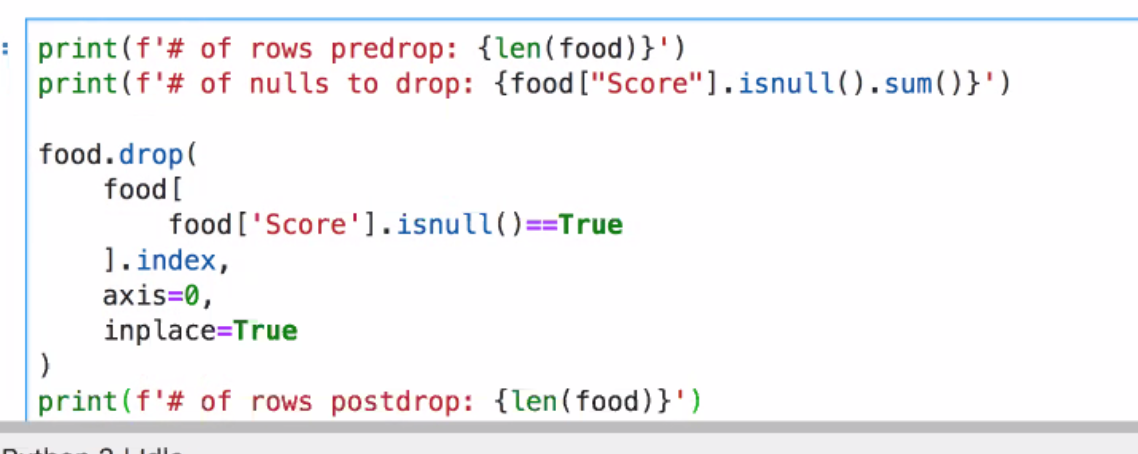

#### Looks like there might be a relationship in nulls b/t `Score` and `Grade`

Do all the nulls of `Score` also have nulls for `Grade`? Vice versa?

In [ ]:
#Your code here
# so we're just filtering a df by 2 conditions... 

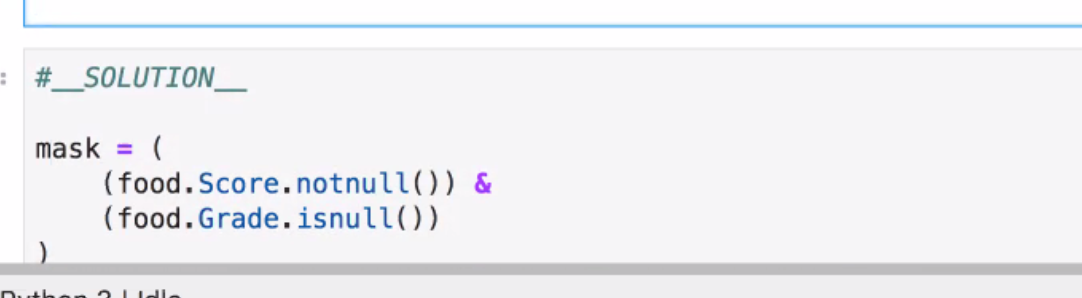

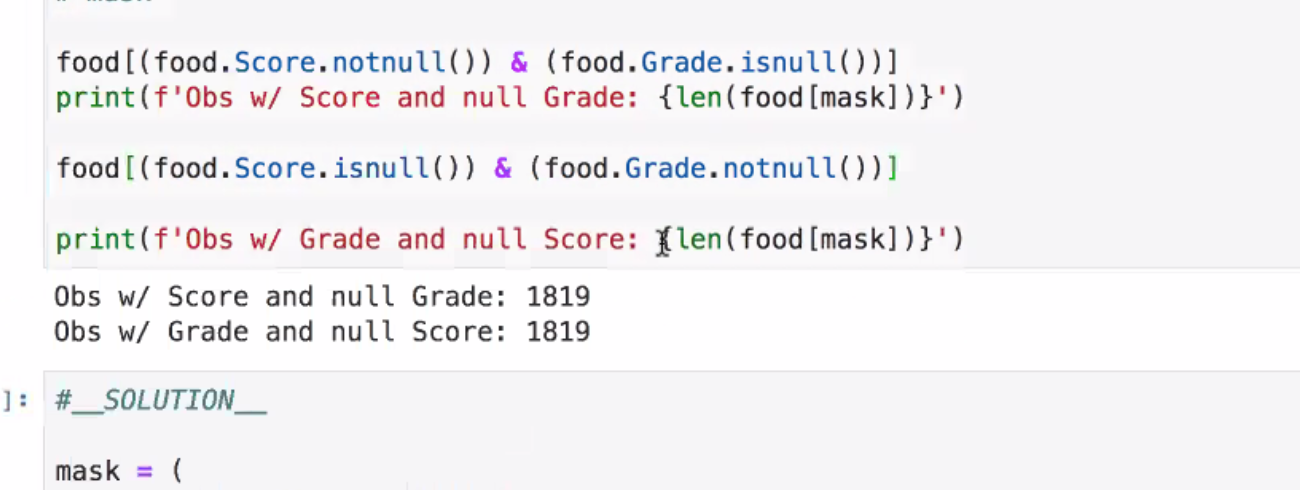

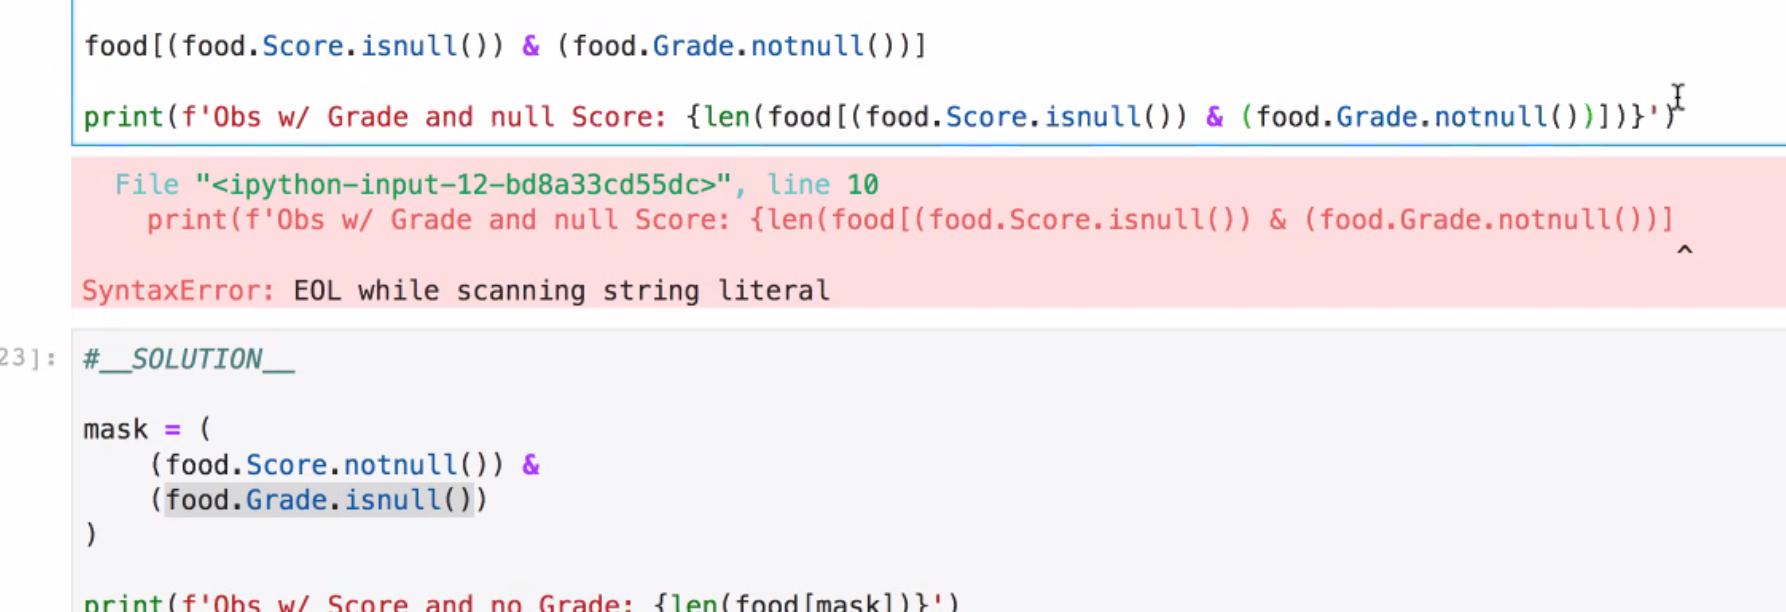

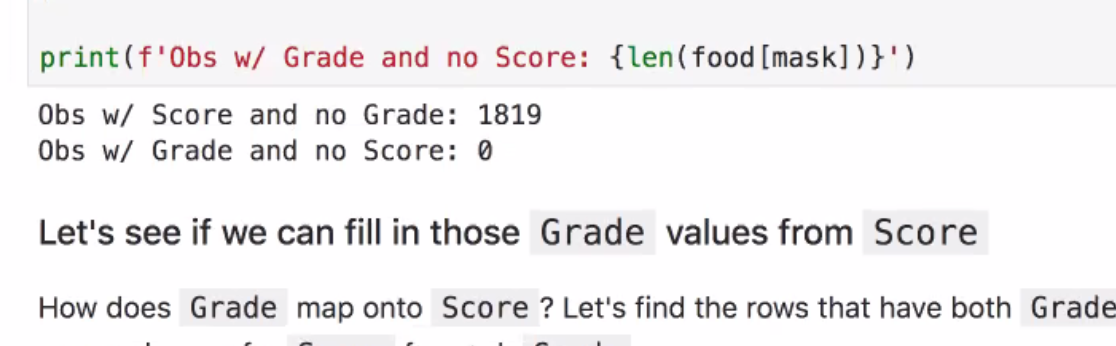

#### Let's see if we can fill in those `Grade` values from `Score`

How does `Grade` map onto `Score`?  Let's find the rows that have both `Grade` and `Score` values, group by `Grade`, and see the min, max and mean for `Score` for each `Grade`

In [ ]:
#Your code here

#### Whelp.  Let's just drop `Grade` then

In [ ]:
#Your code here

#### Let's familiarize ourselves with the levels of the categories for the features that are object types

In [ ]:
#Your code here

#### Do you see some columns that might be duplicated?

Test to see if they're identical

In [ ]:
#Your code here

#### Of the two identical columns, drop the one that comes second

In [ ]:
#Your code here

#### Let's inspect the `InspectionDate` column

What type is it?

In [ ]:
#Your code here

Convert the column to datetime object

In [ ]:
#Your code here

## Data Manipulation

#### Let's keep working with that `InspectionDate` column

Create a column that shows the day of inspection

In [231]:
#Your code here

#### Get mean score per day

In [ ]:
#Your code here

#### Graph!

Give it a title "Average Inspection Score by Date"

Label the axes "Date" and "Avg Inspection Score"

In [ ]:
#Your code here

ax.plot(date_means.index, date_means)


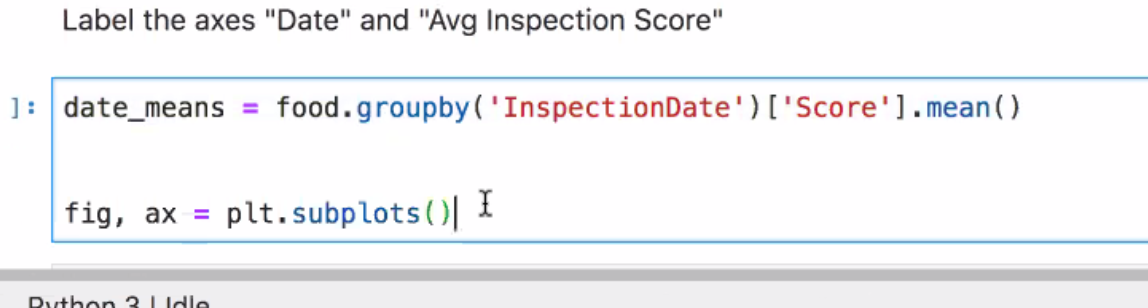

#### Let's say we wanted to compare it to a city that had scores that dropped down to 80

Re-set the scale of the y-axis so it starts at 75 and ends at 100.  Re-graph.

In [ ]:
#Your code here

Let's see how `Score` breaks down by `TypeDescription`.

Create two columns, one whose value is the mean `Score` of the `TypeDescription` value for that row, one whose value is the std of `Score`
- Groupby `TypeDescription` and calc the mean and std of `Score` 
- Merge with `Food` on `TypeDescription` value

In [ ]:
#Your code here

food.merge(food, type_means, left_on='TypeDescription', right_on=True)

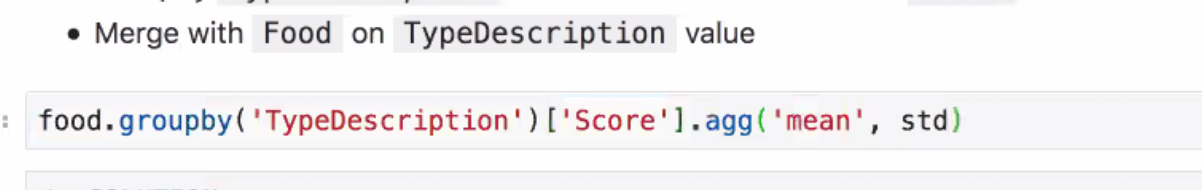

Calculate a new column that's difference between an inspections's `Score` and its `TypeDescription_Mean` in units of `TypeDescription_Std`

In [ ]:
#Your code here
# so (score - typedescription_mean)/typedesctiption_std 
food['Std_Diff'] = # arrithmetic above 

Find the values of `EstablishmentName` of the 20 inspections whose `Score` most exceeds its `TypeDescrition_Mean`

In [ ]:
#Your code here
food.sort_values('Std_Diff', ascending = False).loc[0:20]['EstablishmentName']

# Import Libraries

In [4]:
# SQL Connection and Querying
import sqlite3

# Data manipulation
import pandas as pd

# API Connection
import requests

# Visualization
import matplotlib.pyplot as plt

# SQL

![](index_files/schema.png)

Open a connection to ```chinook.db```

In [6]:
# Your code here
conn = sqlite3.connect('data/chinook.db')

## 1.

>Select all column and rows from the genres table

In [9]:
# Your code here
QUERY = """SELECT * FROM genres"""
df = pd.read_sql(QUERY, conn)
df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


## 2.

1. Select the ```City``` column from the ```customers``` table 
2. Select the ```Name``` column from the ```genres``` table –– aliased as "Genre" .
3. Create a column that counts the number of purchases made from each city for Blues music.
4. Sort the results in descending order.
5. Return the top ten cities.

In [11]:
# Your code here
# q1 = """
# SELECT c.City
# FROM customers c
# JOIN invoices i
# ON c.customerid = i.customerid

# ORDER BY     DESC
# LIMIT 10
# """

# class work through: 

QUERY = """
SELECT c.City, g.Name AS Genre, SUM(ii.quantity) AS Purchases
FROM customers c
JOIN invoices i
USING(CustomerId)

JOIN invoice_items ii
USING(InvoiceId)

JOIN tracks t
USING(TrackId)

JOIN genres g
USING(GenreId)

WHERE Genre = 'Blues'
GROUP BY c.City
ORDER BY Purchases DESC
LIMIT 10
"""
pd.read_sql(QUERY, conn)

#use 'using' when column names are the same

,City,Genre,Purchases
0,Stuttgart,Blues,9
1,Brasília,Blues,6
2,New York,Blues,6
3,Berlin,Blues,5
4,Amsterdam,Blues,4
5,Rome,Blues,4
6,Cupertino,Blues,3
7,Delhi,Blues,3
8,Mountain View,Blues,3
9,Budapest,Blues,2


## 3.

1. Select the ```FirstName``` column from the ```customers``` table
2. Select the ```LastName``` column from the ```customers``` table
3. Select the ```Email``` column from the ```customers``` table
4. Create a new column that is the multiplication of the ```UnitPrice``` and ```Quantity``` columns from the ```invoice_items``` table. 
    - Alias this column as ```Total```.
5. Use ```GROUP BY```  to return the sum total for each customer
6. Sort in descending order
7. Return the top 20 highest spending customers.

In [ ]:
# Your code here


# API


>For this review, we will take a look at three separate APIs and work through the process of writing requests based on each APIs documentation.

## Public Holiday API

>This API provides public holiday information for more than 90 countries. 

>The API's Documentation can be found [here](https://date.nager.at/swagger/index.html)



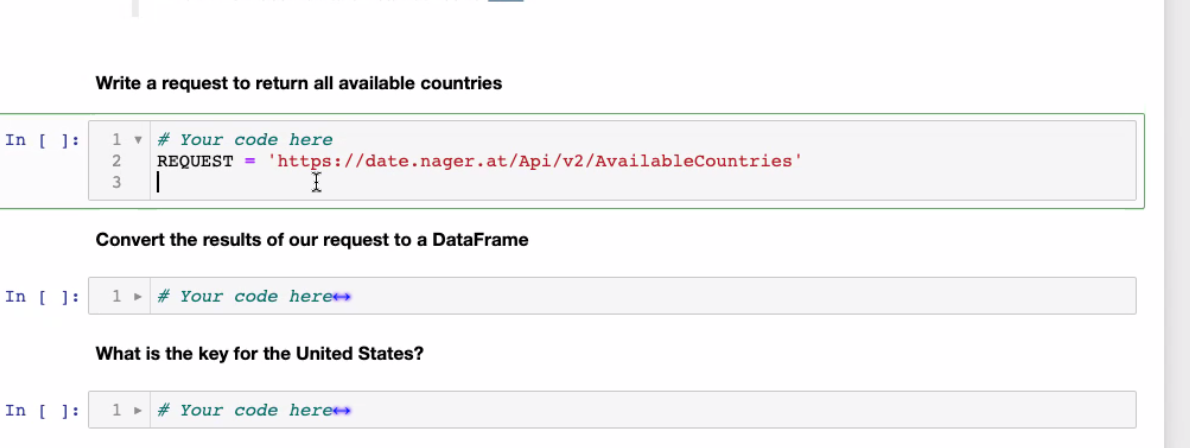

**Write a request to return all available countries**

In [14]:
# Your code here
REQUEST = 'https://date.nager.at/Api/v2/AvailableCountries'
req = requests.get(REQUEST).json()
req

[{'key': 'AD', 'value': 'Andorra'},
 {'key': 'AL', 'value': 'Albania'},
 {'key': 'AR', 'value': 'Argentina'},
 {'key': 'AT', 'value': 'Austria'},
 {'key': 'AU', 'value': 'Australia'},
 {'key': 'AX', 'value': 'Åland Islands'},
 {'key': 'BB', 'value': 'Barbados'},
 {'key': 'BE', 'value': 'Belgium'},
 {'key': 'BG', 'value': 'Bulgaria'},
 {'key': 'BJ', 'value': 'Benin'},
 {'key': 'BO', 'value': 'Bolivia'},
 {'key': 'BR', 'value': 'Brazil'},
 {'key': 'BS', 'value': 'Bahamas'},
 {'key': 'BW', 'value': 'Botswana'},
 {'key': 'BY', 'value': 'Belarus'},
 {'key': 'BZ', 'value': 'Belize'},
 {'key': 'CA', 'value': 'Canada'},
 {'key': 'CH', 'value': 'Switzerland'},
 {'key': 'CL', 'value': 'Chile'},
 {'key': 'CN', 'value': 'China'},
 {'key': 'CO', 'value': 'Colombia'},
 {'key': 'CR', 'value': 'Costa Rica'},
 {'key': 'CU', 'value': 'Cuba'},
 {'key': 'CY', 'value': 'Cyprus'},
 {'key': 'CZ', 'value': 'Czechia'},
 {'key': 'DE', 'value': 'Germany'},
 {'key': 'DK', 'value': 'Denmark'},
 {'key': 'DO', 'valu

**Convert the results of our request to a DataFrame**

In [19]:
# Your code here
countries = pd.DataFrame(req)

**What is the key for the United States?**

In [26]:
# Your code here
us_key = countries[countries['value'] == 'United States']['key'].values[0] # stopping at 'key' returns a series
# so then do .values[0] to get 'US' back as a string

**Make a request to the API that returns the public holidays for the United States**

In [27]:
# Your code here
REQUEST = '''https://date.nager.at/Api/v2/PublicHolidays/2019/{}'''.format(us_key)
req = requests.get(REQUEST).json()

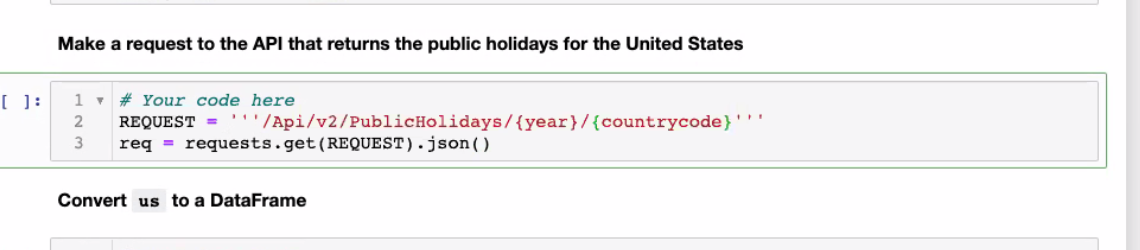

In [28]:
req

[{'date': '2019-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2019-01-21',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2019-02-18',
  'localName': 'Presidents Day',
  'name': "Washington's Birthday",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2019-05-27',
  'localName': 'Memorial Day',
  'name': 'Memorial Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2019-07-04',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'US',
  'fixed': False,
  'global': T

**Convert ```us``` to a DataFrame**

In [30]:
us = pd.DataFrame(req)
us

,date,localName,name,countryCode,fixed,global,counties,launchYear,type
0,2019-01-01,New Year's Day,New Year's Day,US,False,True,None,NaN,Public
1,2019-01-21,"Martin Luther King, Jr. Day","Martin Luther King, Jr. Day",US,False,True,None,NaN,Public
2,2019-02-18,Presidents Day,Washington's Birthday,US,False,True,None,NaN,Public
3,2019-05-27,Memorial Day,Memorial Day,US,False,True,None,NaN,Public
4,2019-07-04,Independence Day,Independence Day,US,False,True,None,NaN,Public
5,2019-09-02,Labor Day,Labour Day,US,False,True,None,NaN,Public
6,2019-10-14,Columbus Day,Columbus Day,US,False,False,"[US-AL, US-AZ, US-CO, US-CT, US-DC, US-GA, US-...",NaN,Public
7,2019-11-11,Veterans Day,Veterans Day,US,False,True,None,NaN,Public
8,2019-11-28,Thanksgiving Day,Thanksgiving Day,US,False,True,None,1863.0,Public
9,2019-12-25,Christmas Day,Christmas Day,US,False,True,None,NaN,Public


In [ ]:
# Your code here
for idx, row, in countries.iterrows():
    key = row.key
    REQUEST = '''https://date.nager.at/Api/v2/PublicHolidays/2019/{}'''.format(us_key)
    req = requests.get(REQUEST).json()
    
# have comfort with interacting and pulling data from APIs
# what you NEED to know - is how to format your requests to those APIs
# UNDERSTANDING THAT AN API REQUEST ARE HTTPS STRINGS.  and there are often times
# different layers/parameters to get that information... 
# when looking API documentation is scroll down to see if there are examples 
# this is a great way to see what the requests should look like. 

## iTunes API

Documentation for this API can be found [here](https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/)

Submit a request to the iTunes API that returns data on Harry Potter Audio Books

In [ ]:
# Your code here


### Level Up

Using the data from the Harry Potter Audio Books request, collect the artistId for each entry and use those IDs to make a single ```https://itunes.apple.com/lookup?id={}&entity=audiobooks&sort=recent``` request. 

To do this:
- Every id should be added to a string
- Each id should be followed by a comma. ie ```id1,id2,id3,id4```
    - The final id should not be followed by a comma
- No id should be added to the string more than once.

In [ ]:
# Your code here


In [142]:
# Run this cell!
REQUEST = 'https://itunes.apple.com/lookup?id={}&entity=audiobook&sort=recent'.format(ARTIST_IDS)
req = requests.get(REQUEST).json()

number_of_results = req['resultCount']
print('Number of results:', number_of_results)

Number of results: 123
